# Assignment 1
## The SIR model of epidemiology
## Nomin Margad-Erdene

We are studying the spread of a virus. Each person can be in one of three states: S (susceptible), I (infective), R (removed). The virus is spread by infective people if they meet with someone susceptible. Those removed from the model (because of immunity) can no longer get the virus.

We model the process of infections in a large population using a daily Markov chain. Because population is large, probabilities of being in a state are the same as the fraction of people being in that state. So we can use the Markov chain not only to forecast the probabilities of one individual, but the shares of population infected.

* "Removed" is an absorbing state, once people get there, they can no longer becone susceptible or infective.
* The probability of an infective person getting cured (and hence becoming removed) is a constant $\mu$ each day. With probability $1-\mu$ they remain infective.
* The probability of a susceptive person becoming infective depends on the fraction of people already infective. If this fraction is denoted $\pi_{It}$, then S people will become I with probability $\lambda \pi_{It}$ each day.

### 1. Write down the transition matrix governing this Markov chain

\begin{align*}
\mathbf{M} = \begin{pmatrix} 
1-\lambda \pi_{It}&\lambda \pi_{It}&0\\
0&1-\mu&\mu\\
0&0&1
\end{pmatrix}
\end{align*}

### 2. Show that in the steady state, the share of infective people is zero

Since $M$ is a stochastic matrix, there should be at least one unit eigenvalue, and $\pi'_*$ (column vector) that satisfies: 

\begin{equation*}
(I - M')\pi'_* = 0    
    \end{equation*}

Then,

\begin{align*}
 \begin{pmatrix} 
\lambda \pi_{I*}& 0&0\\
-\lambda \pi_{I*}&\mu&0\\
0&-\mu&0
\end{pmatrix}
 \begin{pmatrix} 
\pi'_{*11}\\
\pi'_{*21}\\
\pi'_{*31}\\
\end{pmatrix} =  \begin{pmatrix} 
0\\
0\\
0\\
\end{pmatrix}
\end{align*}

Since $\mu>0$, 

for third equation $0*\pi'_{*11} - \mu * \pi'_{*21} + 0*\pi'_{*31} = 0$ to hold, $\pi'_{*21}$ must be zero. Therefore, the share of infective people is zero in steady state.

To be specific, steady state starts immediately when share of infective people reaches zero, and the steady state distribution $\pi'_*$:
* Depends on initial distribution $\pi'_0$ (not unique)
* $\pi'_*$ = $\pi'_n$, where $n$ is the first period when $\pi'_{*21} = 0$

When $\pi_{It} = 0$, the transition matrix is:

\begin{align*}
\mathbf{M} = \begin{pmatrix} 
1 &0&0\\
0&1-\mu&\mu\\
0&0&1
\end{pmatrix}
\end{align*}

And even after arbitrary many periods:
\begin{align*}
M^n = P A^n P^{-1} = \begin{pmatrix} 
1 &0&0\\
0&(1-\mu)^n&1-(1-\mu)^n\\
0&0&1
\end{pmatrix}
\end{align*}

In this matrix, susceptible and removed states are absorbing states in every period.

### 3. Show that if $\lambda/\mu < 1$, the share of infective people is monotonically decreasing

At some period $t+1$, the share of infective people follows this rule:
\begin{align*}
\pi_{I(t+1)} &= (1 + \lambda \pi_{S(t)} - \mu) \pi_{(It)}\\
\end{align*}

Then, the share of infective is monotonically decreasing as long as $(1 + \lambda \pi_{S(t)} - \mu) \leq 1$ for any $t$.

\begin{align*}
&\lambda  \pi_{S(t)} - \mu \leq 0\\
&\frac{\lambda}{\mu}  \pi_{S(t)} \leq 1\\
\end{align*}

Since $\pi_{S_t}<1$ in any period (by definition) and $\frac{\lambda}{\mu}< 1$, their product is also less than 1. And the share of infective is decreasing monotonically.

### 4. Show that, if $\lambda/\mu > 1$, the share of infective people reaches its peak when the share of *susceptible* people equals $\mu/\lambda$

(If $\frac{\lambda}{\mu}>1$, then $\frac{\mu}{\lambda} < 1$ and share of susceptible people can equal $\frac{\mu}{\lambda}$)

From:
\begin{align*}
\pi_{I(t+1)} &= (1 + \lambda \pi_{S(t)} - \mu) \pi_{I(t)}\\
\end{align*}

Replacing $\pi_{S(t)}$ with $\frac{\mu}{\lambda}$, we get $\pi_{I(t+1)} = \pi_{I(t)}$.

At this point the rate of change is zero.

#### To show that this is peak and is unique:

Share of susceptible people follow:
$\pi_{S(t+1)} = (1 - \lambda \pi_{I(t)}) \pi_{S(t)}$

Since $(1 - \lambda \pi_{I(t)} \leq 1)$, we know for sure that $\pi_{S}$ is monotonically decreasing as $t$ increases.

Then, there are 2 cases for initial share of susceptible people:

* $\pi_{S(0)} > \frac{\mu}{\lambda}$ 

Assuming $\pi_{S(t-1)} = \frac{\mu + \epsilon}{\lambda}$, with some $\epsilon \geq 0$

We get: $\pi_{I(t)} = (1 + \lambda \frac{\mu + \epsilon}{\lambda} - \mu) \pi_{I(t-1)} = (1 + \epsilon) \pi_{I(t-1)}$.

This holds between any two consecutive periods until $\pi_{S}$ reaches $\frac{\mu}{\lambda}$

* $\pi_{S(0)} < \frac{\mu}{\lambda}$ 

Assuming $\pi_{S(t-1)} = \frac{\mu - \epsilon}{\lambda}$

We get: $\pi_{I(t)} =  (1 - \epsilon) \pi_{I(t-1)}$.

Therefore, share of susceptible people is decreasing monotonically, and share of infective is increasing while share of susceptible is greater than $\frac{\mu}{\lambda}$ and decreasing when it is less than $\frac{\mu}{\lambda}$.


### 5. Write a Julia function that forecasts the Markov chain from a given starting value

The function takes as input: 
* $InitVals$: (3x1) array of initial values (the 3 states)
* $T$: Integer for number of periods
* $\lambda$: constant, type Float
* $\mu$: constant, type Float

Returns (3xT) array of states for each period

In [1]:
function Markov1!(InitVals::Array{Float64, 1}, T::Int64, λ::Float64, μ::Float64)
    pmf = zeros(3, T) #3xT array for 3 states and T time periods
    pmf[:, 1] = InitVals #first column is the input vector of states
    M = zeros(3, 3, T) #3dim matrix 3x3xT
    a = zeros(1, T) #this is (lambda*share of infected) in each period
    a[1,1] = λ*pmf[2, 1] #frist element is given
    M[:,:,1] = [1-a[1,1] a[1,1] 0; 0 1-μ μ; 0 0 1] #transition matrix
    for t = 2:T
        pmf[:, t] = pmf[:, t-1]' * M[:, :, t-1] #transpose state vector, multiply by transition matrix
        a[1,t] = λ*pmf[2,t] #update the element in matrix that depend on share of infected people
        M[:, :, t] = [1-a[1,t] a[1,t] 0; 0 1-μ μ; 0 0 1] #update the matrix
    end
    return pmf
end

Markov1! (generic function with 1 method)

### 6. Plot the time series of the share of infective people for $\mu=0.1$, $\lambda=0.25$ and $\pi_{I0}=0.01$, $\pi_{S0} = 0.99$.

In [2]:
using Plots

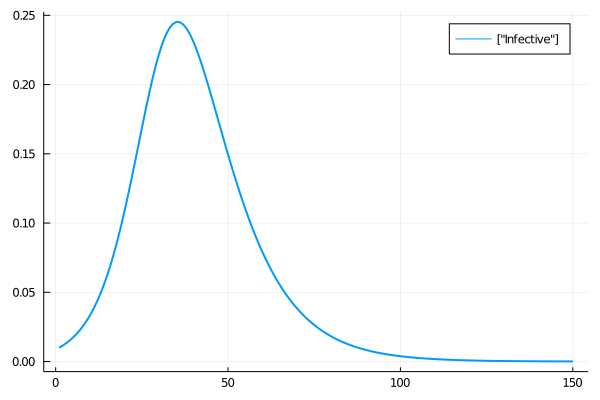

In [3]:
InitVals = [0.99; 0.01; 0.] #initial distribution [S; I, R]
T =150
λ=0.25
μ=0.1

x = Markov1!(InitVals::Array{Float64,1}, T::Int64, λ::Float64, μ::Float64)
#plot(x', label = ["Susceptible" "Infective" "Removed"], lw = 2) 
plot(x'[:,2], label = ["Infective"], lw = 2) 

### 7. Write a function that plots the peak of the share of infective people against $\lambda$ for a given $\mu=0.1$ and $\pi_{I0}=0.01$. Discuss what you learn.

The function takes as input: 
* $Inf\_Prop$: constant float for share of infective people in the initial state
* $\lambda$: vector of lambdas

Returns (1xlength($\lambda$)) array of peaks

In [4]:
function infection_rate!(Inf_Prop::Float64, λ::Array{Float64, 1})
    μ=0.1 #mu is hardcoded
    InitVals = [1 - Inf_Prop; Inf_Prop; 0.0] #susceptible are 1- infected, and removed are zero.
    #i don't think there is any value in changing removed from 0, since it's absorbing state anyways
    T = 250 #periods
    peak = zeros(1,length(λ)) #vector of peaks corresponding to lambdas
    peak2 = zeros(1,length(λ))
    for i = 1:length(λ)
        x = Markov1!(InitVals, T, λ[i,1], μ) #use the previous function to get array of states
        peak[1,i] = findmax(x[2,:])[1] #find max of second row of the states array (infected)
        peak2[1,i] = findmax(x[3,:])[1] #find max of third row of the states array (removed)
    end
    return peak, peak2
end

infection_rate! (generic function with 1 method)

Since we don't want any element of transition matrix to be greater than 1, this function finds higest possible lambda for which $max(\pi_{I_t})*\lambda< 1$    
Takes as input: 
* $Inf\_Prop$: constant float for share of infective people in the initial state
* $\lambda$: vector of lambdas

Returns $\lambda\_n$ higest possible lambda given other paramteres

In [5]:
function peak_test!(Inf_Prop::Float64, λ::Array{Float64, 1})
    
    #does the same thing with infection_rate! function, but breaks the loop when peak_t*λ exceeds 1
    # and retuns previous lambda, last lambda that did not exceed limit
    μ=0.1
    InitVals = [1 - Inf_Prop; Inf_Prop; 0.0]
    T = 250 #periods
    peak_lambda = 0
    peak_t = zeros(1,length(λ))
    for i = 1:length(λ)
        x = Markov1!(InitVals, T, λ[i,1], μ)
        peak_t = findmax(x[2,:])[1]
        if peak_t*λ[i,1] > 1
            peak_lambda = λ[i-1,1]
            break
        end
    end
    return peak_lambda
end

peak_test! (generic function with 1 method)

I define some range with arbitrarily large lambda and initial infective share.
Initial share of susciptible is defined as (1 - infective) and initial share of removed is 0. I don't think there is any value in changing removed from 0, since it's absorbing state anyways.

Function peak_test! gives me the highest possible value of lambda that can be used given the paramteres. 
I use that to limit the range of lambdas and find peaks of infective for each lambda. 

I wanted to see the dynamics of removed, so yellow line plots peaks of removed.


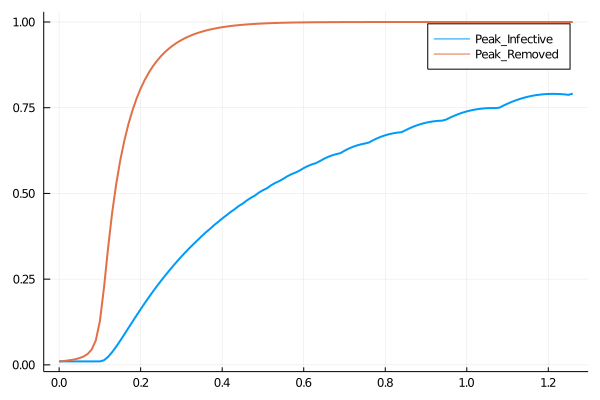

In [6]:
λ_test = Array(range(0, 10, step = 0.01)) 
Inf_Prop = 0.01 #share of infected in first period
λ_n = peak_test!(Inf_Prop, λ_test)
λ = Array(range(0, λ_n, step = 0.01)) 
k = ones(2,length(λ))
k[1,:] = infection_rate!(Inf_Prop, λ)[1]
k[2,:] = infection_rate!(Inf_Prop, λ)[2]#k will be vector of peaks of infected for each lambda
plot(λ, k', label = ["Peak_Infective" "Peak_Removed"], lw = 2) 

* at any period,  $\lambda \pi_{I_t} \leq 1$ must hold for the transition matrix to not have elements greater than 1. In the above example with $\pi_{I_0} = 0.01$, the highest lambda we can have is 2.16
* since we fixed $\mu = 0.1$, while $\lambda < 0.1$, the share of infected is decreasing from the initial value and once it reaches zero, the system is stuck at a steady state, locking other 2 states at whatever value they were in. The peak of infective is the initial share of infective in this case. The removed state will absorb all available infective until it reaches zero. Therefore, we see that for low values of lambda, we don't get many removed and most people stay susceptive.
* Approximately for $\lambda \geq 0.5$, we see that everyone eventually reaches removed state. Before the share of infective reaches zero (this depends on how quickly $\mu$ pulls people to removed), the $\pi_I*\lambda$ manages to pull everyone from susceptible. 
* For approximately $0.1 \leq \lambda \leq 0.5$, we see that the share of infective reaches zero before everyone becomes removed, leaving some in susceptible state. For example, at $\lambda = 0.2$, we have max around 20% of population infectied simultaneously, but around 80% were infected at some point in time and ended up removed. Here, the lambda is not large enough, so $\mu$ still pulls faster and manages to empty infectives before susceptibles are finished. 